In [1]:
'''
用于调试代码
'''
from FMG_P import *

In [2]:
db_file_path = r"D:\LEARNINNNNNNNNNNNNG\ExperimentData\20230326传感器校准数据\3-1.db"
pressure_file_path = r"D:\LEARNINNNNNNNNNNNNG\ExperimentData\20230326传感器校准数据\3-1.txt"

# 读取FMG数据和压力数据
raw_FMG = pd.read_table(db_file_path,  sep = ';', header = None)
FMG_channel = 1
pressure = PZ.read_pressure(pressure_file_path)

final_data = pd.DataFrame()

FMG_timestamp_list = []
prss_timestamp_list = []

for i in range(pressure.shape[0]):
    prss_timestamp_list.append(get_prss_timestamp(pressure['date'][i] + " " + pressure['time'][i]))
    pass

for i in range(raw_FMG.shape[0]):
    FMG_timestamp_list.append(get_FMG_timestamp(raw_FMG[0][i]))
    pass

FMG_mean = mean_FMG_1s(db_file_path, 1) # dataframe

# 对应FMG数值与气压值
for i in range(pressure.shape[0]):
    for j in range(FMG_mean.shape[0]):
        if FMG_mean["time_stamp"][j] == prss_timestamp_list[i] - 1:
            final_data = pd.concat([final_data, pd.DataFrame({'time': pressure['time'][i],
                                                            'P/mmHg': pressure['pressure'][i],
                                                            'FMG': FMG_mean["FMG"][j]}, index=[0])], ignore_index=True)
            break

FMG = final_data['FMG'].values
P1 = final_data['P/mmHg'].values

max_FMG_index = np.where(P1 == max(P1))[0][0]

np.where(P1 == max(P1))

(array([28, 29], dtype=int64),)

In [3]:
np.where(P1 == max(P1))[0][0]


28

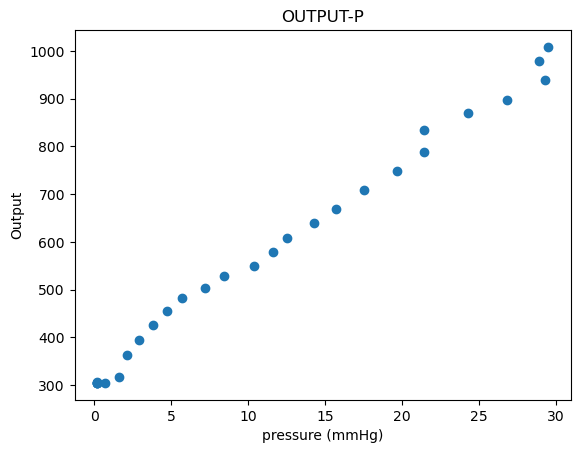

[ 0.2  0.2  0.2  0.2  0.2  0.7  1.6  2.1  2.9  3.8  4.7  5.7  7.2  8.4
 10.4 11.6 12.5 14.3 15.7 17.5 19.7 21.4 21.4 24.3 26.8 29.3 28.9 29.5] [ 304.72911695  306.1232539   304.77963272  305.5819209   304.69869707
  304.70898599  316.5815832   363.80645161  394.03709677  426.2442053
  455.61563255  482.0247117   503.37161608  527.58271605  549.85157546
  578.15498763  609.03643725  640.22543353  668.43724364  708.01795918
  749.29792531  788.38075658  833.94884488  869.8094449   896.80177276
  939.26533997  977.95090016 1008.10615883]


In [4]:
plt.figure()
plt.scatter(P1[0 : max_FMG_index], FMG[0 : max_FMG_index], label = "system output")
plt.title("OUTPUT-P")
plt.xlabel("pressure (mmHg)")
plt.ylabel("Output")
plt.show()
print(P1[0 : max_FMG_index], FMG[0 : max_FMG_index])

numpy.ndarray

[-9.97726617e+00 -1.77691932e+01  3.38186023e-01  6.43496104e-23
  2.59862671e+00  2.75344586e+02]


e:\code\wearable_lab\FMG_P.py:76: RuntimeWarning: invalid value encountered in power
  return C0*np.power((r - np.power(64*D*h*(1 + 0.488*np.power(h, 2)/np.power(t, 2))/P, 0.25)), 2) + b
e:\anaconda\install\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


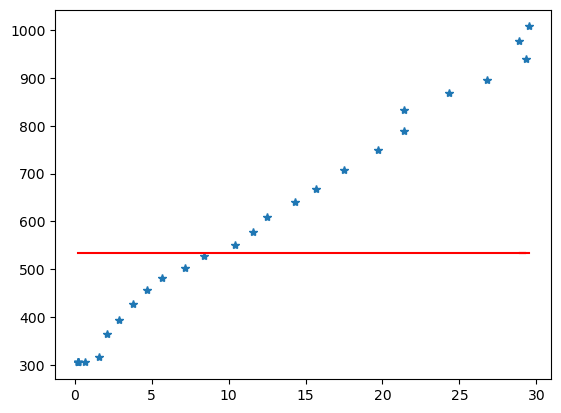

In [6]:
import pylab
from scipy.optimize import curve_fit

popt, pcov = curve_fit(plate_func, P1[0 : max_FMG_index], FMG[0 : max_FMG_index])
y_pred = [plate_func(i, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]) for i in P1[0 : max_FMG_index]]
print(popt)

plot1 = pylab.plot(P1[0 : max_FMG_index], FMG[0 : max_FMG_index], '*', label = 'original')
plot2 = pylab.plot(P1[0 : max_FMG_index], y_pred, 'r', label = 'fit curve')
pylab.show()

           5            4          3         2
6.791e-05 x - 0.006348 x + 0.2217 x - 3.492 x + 44.94 x + 289.5


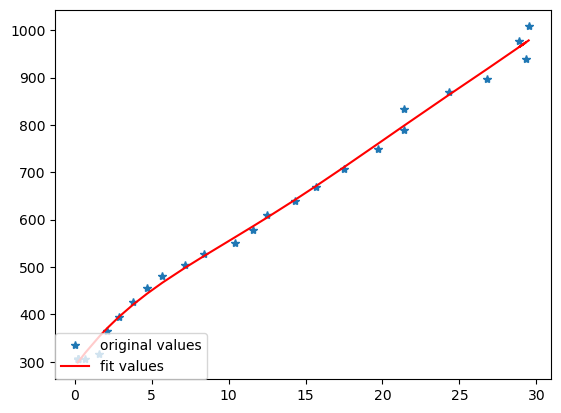

<Figure size 640x480 with 0 Axes>

In [9]:
import pylab
import numpy as np


x = P1[0 : max_FMG_index]
y = FMG[0 : max_FMG_index]

z1 = np.polyfit(x, y, 5)              # 曲线拟合，返回值为多项式的各项系数
p1 = np.poly1d(z1)                    # 返回值为多项式的表达式，也就是函数式子
print(p1)
y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
# print(np.polyval(p1, 29))             根据多项式求解特定 x 对应的 y 值
# print(np.polyval(z1, 29))             根据多项式求解特定 x 对应的 y 值

plot1 = pylab.plot(x, y, '*', label='original values')
plot2 = pylab.plot(x, y_pred, 'r', label='fit values')
pylab.title('')
pylab.xlabel('')
pylab.ylabel('')
pylab.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
pylab.show()
# pylab.savefig('p1.png', dpi=200, bbox_inches='tight')

